# Multi-Class SVMs

In [5]:
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [6]:
from pystruct.models import MultiClassClf
from pystruct.learners import NSlackSSVM

# do a binary digit classification
digits = load_digits()
X, y = digits.data, digits.target
#X = X / 255.
X = X / 16.
#y = y.astype(np.int) - 1
X_train, X_test, y_train, y_test = train_test_split(X, y)

# we add a constant 1 feature for the bias
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train_bias.shape)

(1347, 65)


In [7]:
model = MultiClassClf(n_features=X_train_bias.shape[1], n_classes=10)

In [13]:
model.joint_feature(X_train_bias[0], 1).shape

(650,)

In [11]:
n_slack_svm = NSlackSSVM(model, verbose=2, check_constraints=False, C=0.1,
                         batch_size=100, tol=1e-2)

In [19]:
# n-slack cutting plane ssvm
start = time()
n_slack_svm.fit(X_train_bias, y_train)
time_n_slack_svm = time() - start
y_pred = np.hstack(n_slack_svm.predict(X_test_bias))
print("Score with pystruct n-slack ssvm: %f (took %f seconds)"
      % (np.mean(y_pred == y_test), time_n_slack_svm))

Training n-slack dual structural SVM
iteration 0
24 support vectors out of 97 points
Box constraints at C: 0
dual objective: 0.249840
66 support vectors out of 194 points
Box constraints at C: 16
dual objective: 2.045509
108 support vectors out of 291 points
Box constraints at C: 32
dual objective: 3.390943
138 support vectors out of 387 points
Box constraints at C: 51
dual objective: 5.075309
186 support vectors out of 476 points
Box constraints at C: 80
dual objective: 7.866693
226 support vectors out of 555 points
Box constraints at C: 120
dual objective: 10.539251
253 support vectors out of 617 points
Box constraints at C: 146
dual objective: 12.449698
284 support vectors out of 673 points
Box constraints at C: 166
dual objective: 14.248342
302 support vectors out of 723 points
Box constraints at C: 190
dual objective: 15.869553
341 support vectors out of 781 points
Box constraints at C: 209
dual objective: 17.661413
355 support vectors out of 824 points
Box constraints at C: 231
d

In [21]:
n_slack_svm.w.shape

(650,)

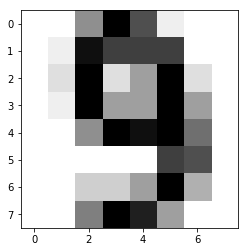

In [28]:
plt.imshow(X_test[0].reshape(8, 8), cmap='gray_r')

In [23]:
n_slack_svm.predict([X_test_bias[0]])

array([9])

In [32]:
for i in range(10):
    print("{}: {:2f}".format(i, np.dot(n_slack_svm.w, n_slack_svm.model.joint_feature(X_test_bias[0], i))))

0: 0.517918
1: -1.424855
2: -0.680596
3: 0.005999
4: -0.524932
5: 0.267443
6: -0.466166
7: 0.277219
8: 0.384943
9: 1.643028


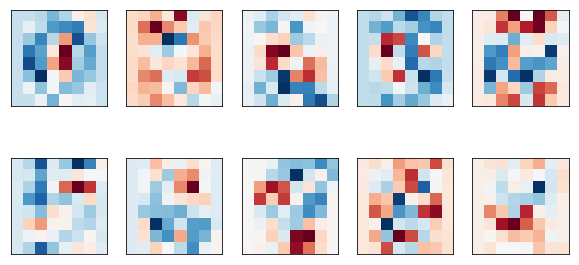

In [42]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks': (()), 'yticks':(())})
w_perclass = n_slack_svm.w.reshape(10, -1)
for i, ax in zip(range(10), ax.ravel()):
    ax.imshow(w_perclass[i][:-1].reshape(8, 8), cmap=plt.cm.RdBu)

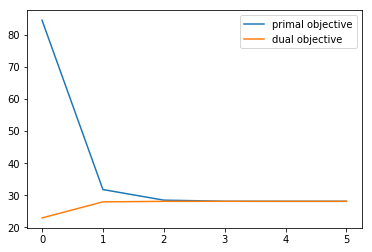

In [10]:
plt.plot(n_slack_svm.primal_objective_curve_, label="primal objective")
plt.plot(n_slack_svm.objective_curve_, label="dual objective")
plt.legend()

# Exercises
1) Replace the n-slack ssvm by a sugradient ssvm.

2) Replace the MultiClassClf by a GraphCRF with a single node and no edges.